## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os
import re

In [2]:
#sns.set_theme("darkgrid")
sns.set_theme()

# Plotting training curve with confidence interval

## Prepare data

In [3]:
def load_data_files(data_dir):
    data = None
    for file in os.listdir(data_dir):
        run = pd.read_csv(os.path.join(data_dir, file), index_col=0)
        if data is None:
            data = run
        else:
            data = data.append(run, ignore_index=True)
    return data

## Plot

The `ci` parameter changes the shaded area definition:
 - integer value gives the confidence interval at that interval (default: 95)
 - "sd" gives the standard deviation

In [4]:
def plot_runs(runs, y="Episode Return", ci="sd", 
               ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
               names=None, colors=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 8))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.lineplot(data=runs, x="Step", y=y, hue="Name", ax=ax, ci=ci, palette=colors)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)

def load_and_plot(model_runs_dir):
    # Load runs
    runs = dict()
    for run_dir in os.listdir(model_runs_dir):
        run = load_data_files(os.path.join(model_runs_dir, run_dir))
        run["Name"] = run_dir
        # Print info
        nb_runs = run.shape[0] / 1000
        last_step = run.iloc[-1]["Step"]
        final_mean_reward = run.query(f"Step == {last_step}")["Value"].mean()
        final_std = run.query(f"Step == {last_step}")["Value"].std()
        print(f'Run {run_dir} with {nb_runs} runs, final mean episode reward = {final_mean_reward}, final std = {final_std}.')
        # Add to list
        runs[run_dir] = run
    # Aggregate and plot
    plot_runs(list(runs.values()))
    return runs

Run h4_nev8_tanh_init1_run100_109 with 10.0 runs, final mean episode reward = -160.7808410644531, final std = 25.93411906651465.
Run h4_nev8_run30_39 with 10.0 runs, final mean episode reward = -177.94925994873046, final std = 17.194163523991087.
Run h8_nev8_run50_59 with 10.0 runs, final mean episode reward = -170.48688812255858, final std = 8.306868110519986.
Run h4_nev16_run40_49 with 10.0 runs, final mean episode reward = -163.2858093261719, final std = 11.433418025399977.
Run h4_nev16_tanh_run80_89 with 10.0 runs, final mean episode reward = -161.04940643310547, final std = 11.786281125272975.
Run h4_nev8_tanh_run65_74 with 10.0 runs, final mean episode reward = -163.4786407470703, final std = 20.07469159454208.
Run h4_nev8_tanh_init5_run90_99 with 10.0 runs, final mean episode reward = -168.1171646118164, final std = 15.130288270799348.


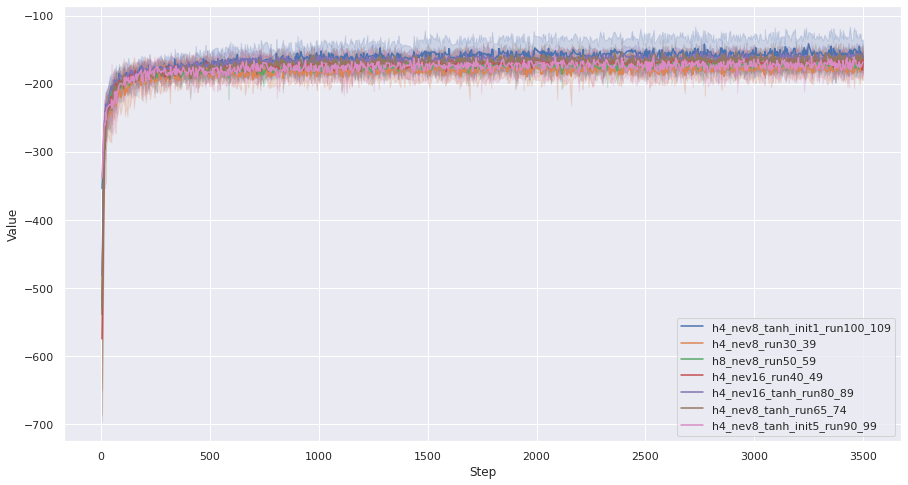

In [33]:
cmaes_runs = load_and_plot("data/cmaes/")

In [34]:
cmaes_runs["h4_nev8_tanh_run65_74"]

,Step,Value,Name
0,4,-433.527740,h4_nev8_tanh_run65_74
1,14,-278.343414,h4_nev8_tanh_run65_74
2,15,-277.049286,h4_nev8_tanh_run65_74
3,18,-310.611145,h4_nev8_tanh_run65_74
4,19,-240.577499,h4_nev8_tanh_run65_74
...,...,...,...
9995,3489,-147.507477,h4_nev8_tanh_run65_74
9996,3491,-151.211105,h4_nev8_tanh_run65_74
9997,3493,-146.617081,h4_nev8_tanh_run65_74
9998,3496,-164.764969,h4_nev8_tanh_run65_74


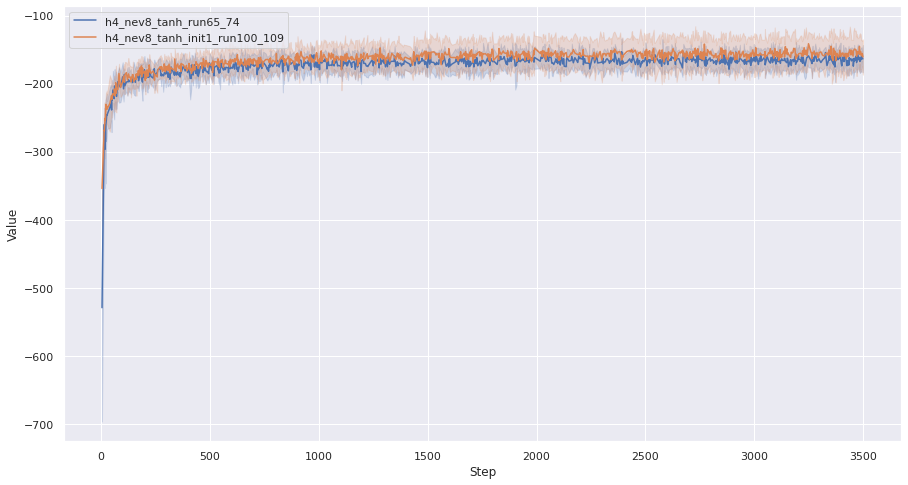

In [36]:
plot_runs([cmaes_runs["h4_nev8_tanh_run65_74"],cmaes_runs["h4_nev8_tanh_init1_run100_109"]])

Run 2addpg_fo_abs_cont_dr_run45_54 with 10.0 runs, final mean episode reward = -139.7624969482422, final std = 34.26023519617733.


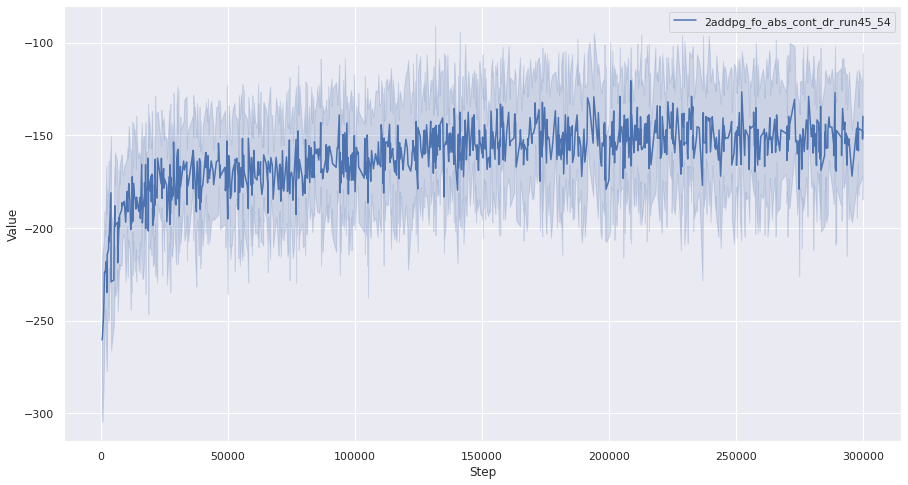

In [49]:
maddpg_runs = load_and_plot("data/maddpg/")

Run qmix_fo_abs_disc_dr_run10_19 with 10.0 runs, final mean episode reward = -149.57798690795897, final std = 35.625042889670276.


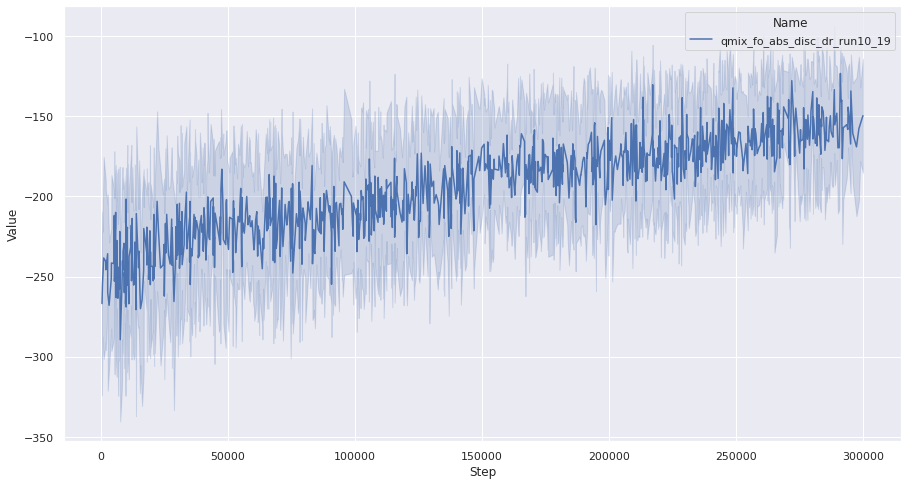

In [17]:
qmix_runs = load_and_plot("data/qmix/")

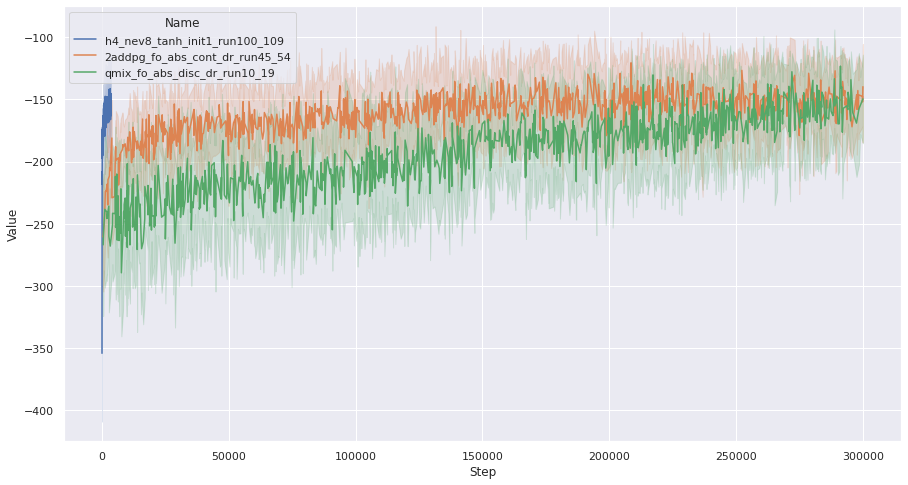

In [18]:
plot_runs([
    cmaes_runs["h4_nev8_tanh_init1_run100_109"],
    maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"],
    qmix_runs["qmix_fo_abs_disc_dr_run10_19"]
])

In [66]:
qmix_runs["qmix_fo_abs_disc_dr_run10_19"]["Step"] = [i * 150 for n in range(10) for i in range(1, 1001)]

In [69]:
maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"]["Step"] = [i * 150 for n in range(10) for i in range(1, 1001)]

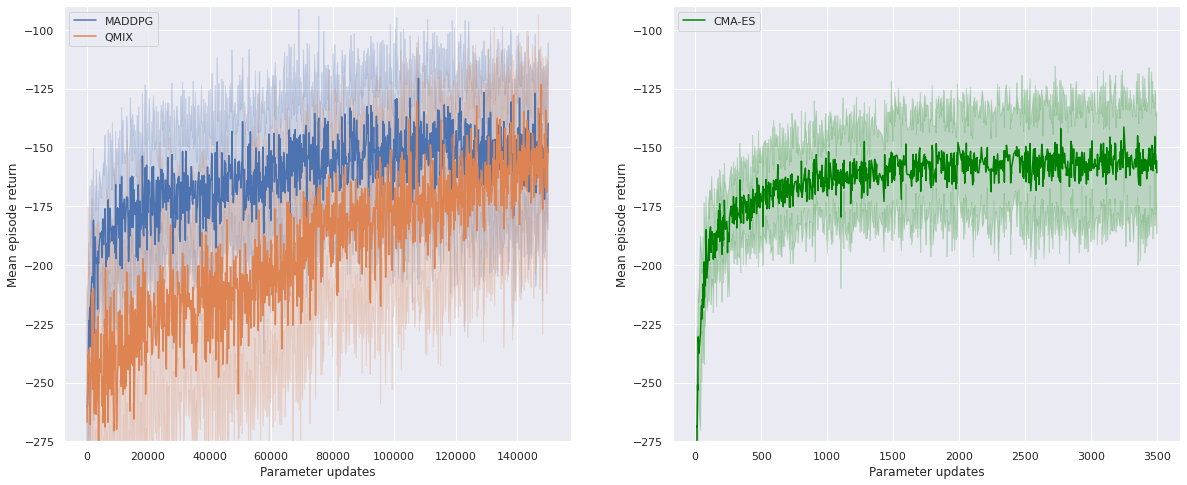

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ylim = (-275, -90)
plot_runs([maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"], qmix_runs["qmix_fo_abs_disc_dr_run10_19"]], 
            ax=ax1, ylim=ylim, names=['MADDPG', 'QMIX'], loc='upper left', ax_xlabel='Parameter updates', 
            ax_ylabel='Mean episode return')
plot_runs([cmaes_runs["h4_nev8_tanh_init1_run100_109"]], ax=ax2, ylim=ylim, names=['CMA-ES'], 
            loc='upper left', colors=['green'], ax_xlabel='Parameter updates', 
            ax_ylabel='Mean episode return')

In [141]:
qmix_fo_rel_disc_shaped = load_data_files("../models/coop_push_scenario_sparse/qmix_fo_rel_disc_shaped/runs_data/")
qmix_po_rel_disc_shaped = load_data_files("../models/coop_push_scenario_sparse/qmix_po_rel_disc_shaped/runs_data/")
qmix_poshort_rel_disc_shaped = load_data_files("../models/coop_push_scenario_sparse/qmix_poshort_rel_disc_shaped/runs_data/")
maddpg_fo_rel_disc = load_data_files("../models/coop_push_scenario_sparse/2addpg_fo_rel_disc/runs_data/")
maddpg_po_rel_disc = load_data_files("../models/coop_push_scenario_sparse/2addpg_po_rel_disc/runs_data/")
maddpg_poshort_rel_disc = load_data_files("../models/coop_push_scenario_sparse/2addpg_poshort_rel_disc/runs_data/")


In [142]:
qmix_fo_rel_disc_shaped["Name"] = "qmix_fo"
qmix_po_rel_disc_shaped["Name"] = "qmix_po"
qmix_poshort_rel_disc_shaped["Name"] = "qmix_poshort"
maddpg_fo_rel_disc["Name"] = "maddpg_fo"
maddpg_po_rel_disc["Name"] = "maddpg_po"
maddpg_poshort_rel_disc["Name"] = "maddpg_poshort"

In [143]:
qmix_fo_rel_disc_shaped["# Training Episode"] = qmix_fo_rel_disc_shaped["Step"] / 100
qmix_po_rel_disc_shaped["# Training Episode"] = qmix_po_rel_disc_shaped["Step"] / 100
qmix_poshort_rel_disc_shaped["# Training Episode"] = qmix_poshort_rel_disc_shaped["Step"] / 100
maddpg_fo_rel_disc["# Training Episode"] = maddpg_fo_rel_disc["Step"] / 100
maddpg_po_rel_disc["# Training Episode"] = maddpg_po_rel_disc["Step"] / 100
maddpg_poshort_rel_disc["# Training Episode"] = maddpg_poshort_rel_disc["Step"] / 100

In [84]:
def plot_runs(runs, x="# Training Episode", y="Episode return", ci="sd", 
               ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
               names=None, colors=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.lineplot(data=runs, x=x, y=y, hue="Name", ax=ax, ci=ci, palette=colors)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)

In [90]:
def box_plot_runs(runs, x="Training Eps", y="Mean Return", 
             ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
             names=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.boxplot(x=x, y=y, hue="Name", data=runs, ax=ax)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)

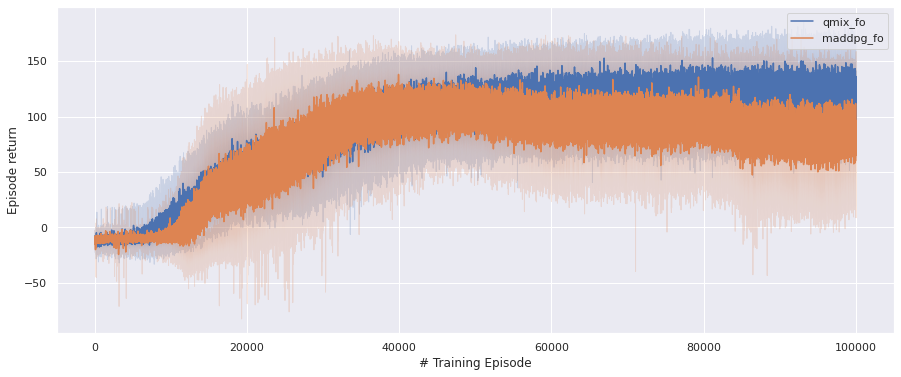

In [63]:
plot_runs([qmix_fo_rel_disc_shaped, maddpg_fo_rel_disc])

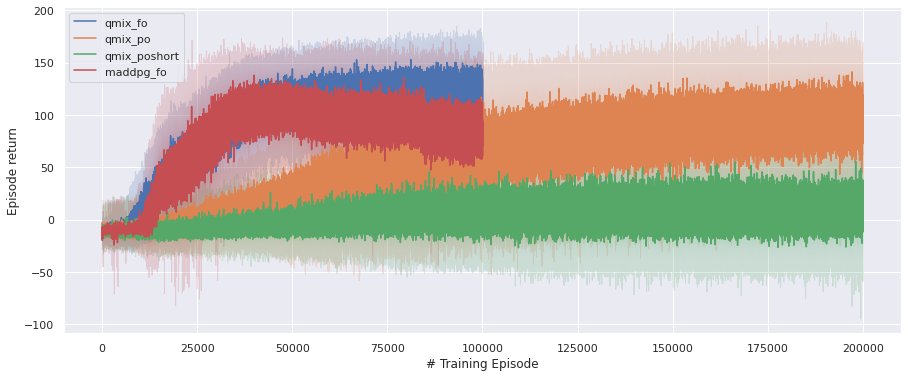

In [123]:
plot_runs([qmix_fo_rel_disc_shaped, qmix_po_rel_disc_shaped, qmix_poshort_rel_disc_shaped, maddpg_fo_rel_disc])

In [54]:
def mov_avg(run_df, mean_range=100):
    new_df = pd.DataFrame(columns=run_df.columns)
    for i in tqdm(range(0, run_df.shape[0], mean_range)):
        new_df = new_df.append({
            "# Training Episode": run_df.at[i + mean_range - 1, "# Training Episode"],
            "Episode return": run_df.iloc[i:i + mean_range, 1].mean(),
            "Success": run_df.iloc[i:i + mean_range, 2].mean(),
            "Episode length": run_df.iloc[i:i + mean_range, 3].mean(),
            "Name": run_df.at[i, "Name"]
        }, ignore_index=True)
    return new_df

In [124]:
avg_qmix = mov_avg(qmix_fo_rel_disc_shaped)
avg_qmix_po = mov_avg(qmix_po_rel_disc_shaped)
avg_qmix_poshort = mov_avg(qmix_poshort_rel_disc_shaped)

100%|███████████████████████████████████████████████████████████| 22000/22000 [01:29<00:00, 246.91it/s]


In [145]:
avg_maddpg = mov_avg(maddpg_fo_rel_disc)
avg_maddpg_po = mov_avg(maddpg_po_rel_disc)
avg_maddpg_po_short = mov_avg(maddpg_poshort_rel_disc)

100%|█████████████████████████████████████████████████████████████| 8000/8000 [00:32<00:00, 245.09it/s]


In [147]:
avg_qmix.iloc[:-3000]

,Step,Episode return,Success,Episode length,Name,# Training Episode
0,NaN,-10.730947,0.0,100.00,qmix_fo,99.0
1,NaN,-11.076803,0.0,100.00,qmix_fo,199.0
2,NaN,-11.744497,0.0,100.00,qmix_fo,299.0
3,NaN,-10.852177,0.0,100.00,qmix_fo,399.0
4,NaN,-11.049252,0.0,100.00,qmix_fo,499.0
...,...,...,...,...,...,...
7995,NaN,119.771256,1.0,39.58,qmix_fo,99599.0
7996,NaN,121.191869,1.0,40.68,qmix_fo,99699.0
7997,NaN,123.424208,1.0,42.04,qmix_fo,99799.0
7998,NaN,120.125722,1.0,40.47,qmix_fo,99899.0


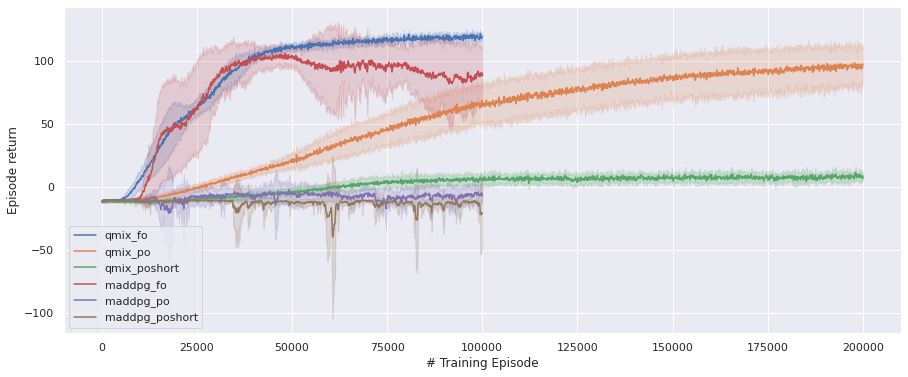

In [148]:
plot_runs([avg_qmix.iloc[:-3000], 
           avg_qmix_po.iloc[:-3000], 
           avg_qmix_poshort.iloc[:-3000], 
           avg_maddpg.iloc[:-3000], 
           avg_maddpg_po, 
           avg_maddpg_po_short])

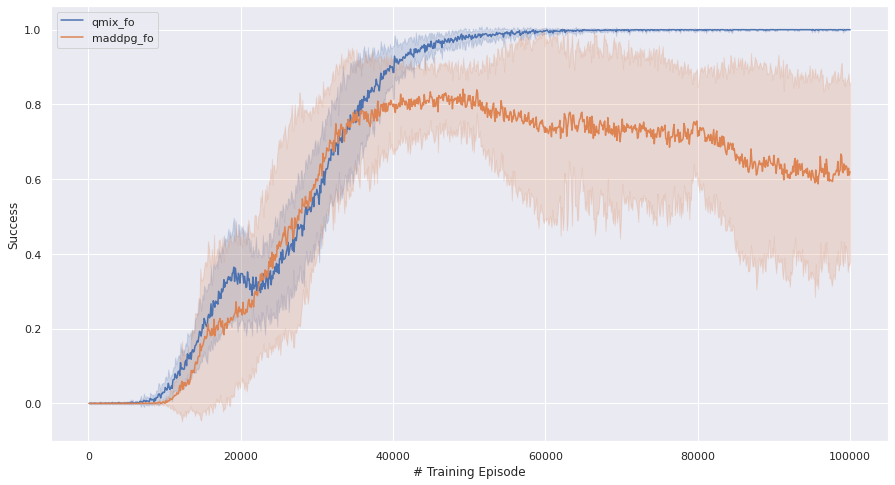

In [59]:
plot_runs([avg_qmix, avg_maddpg], y="Success")

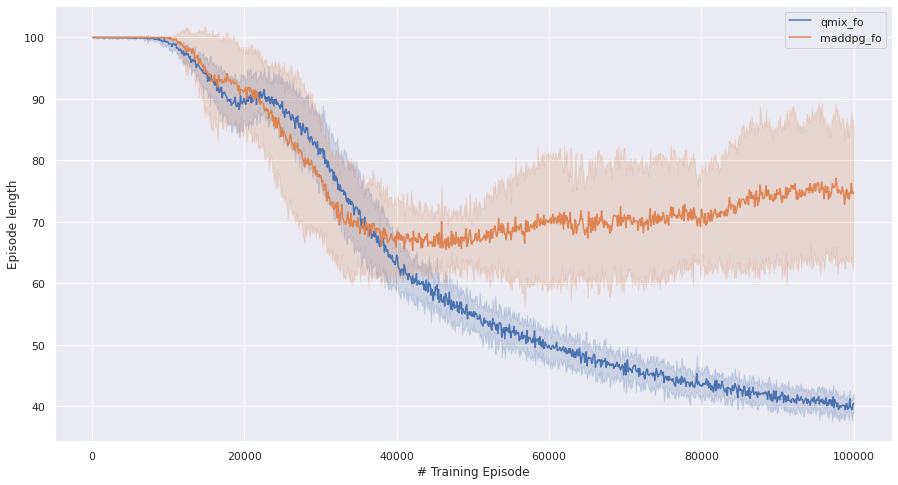

In [60]:
plot_runs([avg_qmix, avg_maddpg], y="Episode length")

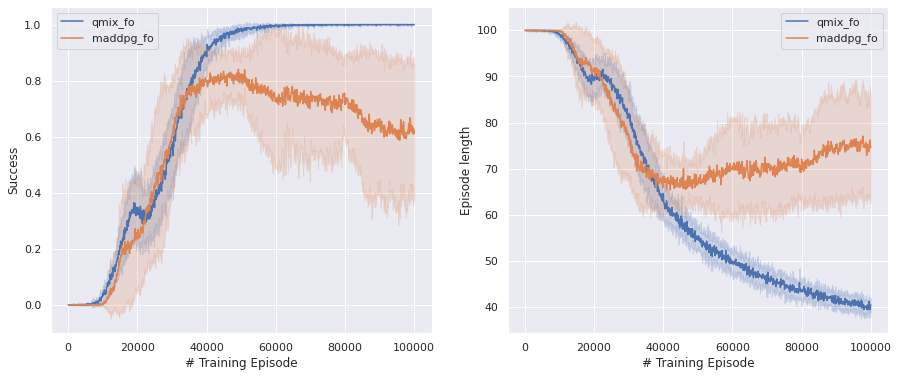

In [65]:
figure, axis = plt.subplots(1, 2, figsize=(15,6))
plot_runs([avg_qmix, avg_maddpg], y="Success", ax=axis[0])
plot_runs([avg_qmix, avg_maddpg], y="Episode length", ax=axis[1])

In [94]:
avg_qmix

,Step,Episode return,Success,Episode length,Name,# Training Episode
0,NaN,-10.730947,0.0,100.00,qmix_fo,99.0
1,NaN,-11.076803,0.0,100.00,qmix_fo,199.0
2,NaN,-11.744497,0.0,100.00,qmix_fo,299.0
3,NaN,-10.852177,0.0,100.00,qmix_fo,399.0
4,NaN,-11.049252,0.0,100.00,qmix_fo,499.0
...,...,...,...,...,...,...
10995,NaN,121.359092,1.0,41.82,qmix_fo,99599.0
10996,NaN,118.918847,1.0,40.60,qmix_fo,99699.0
10997,NaN,120.469968,1.0,41.38,qmix_fo,99799.0
10998,NaN,121.736586,1.0,41.15,qmix_fo,99899.0


In [136]:
avg10000_qmix = mov_avg(qmix_fo_rel_disc_shaped, mean_range=10000)
avg10000_maddpg = mov_avg(maddpg_fo_rel_disc, mean_range=10000)
avg10000_qmix["# Training Episode"] = avg10000_qmix["# Training Episode"] + 1
avg10000_qmix["# Training Episode"] = avg10000_qmix["# Training Episode"].astype(int)
avg10000_maddpg["# Training Episode"] = avg10000_maddpg["# Training Episode"] + 1
avg10000_maddpg["# Training Episode"] = avg10000_maddpg["# Training Episode"].astype(int)

100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 293.43it/s]


In [137]:
avg5000_qmix = mov_avg(qmix_fo_rel_disc_shaped, mean_range=5000)
avg5000_maddpg = mov_avg(maddpg_fo_rel_disc, mean_range=5000)
avg5000_qmix["# Training Episode"] = avg5000_qmix["# Training Episode"] + 1
avg5000_qmix["# Training Episode"] = avg5000_qmix["# Training Episode"].astype(int)
avg5000_maddpg["# Training Episode"] = avg5000_maddpg["# Training Episode"] + 1
avg5000_maddpg["# Training Episode"] = avg5000_maddpg["# Training Episode"].astype(int)

100%|███████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 291.26it/s]


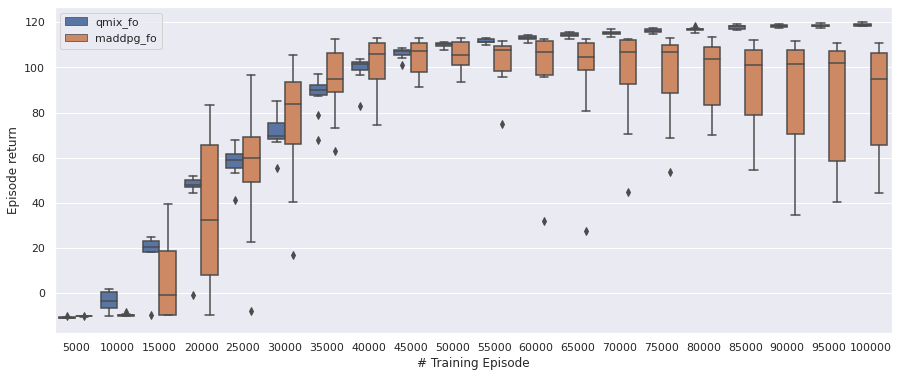

In [138]:
box_plot_runs([avg5000_qmix, avg5000_maddpg], x="# Training Episode", y="Episode return")

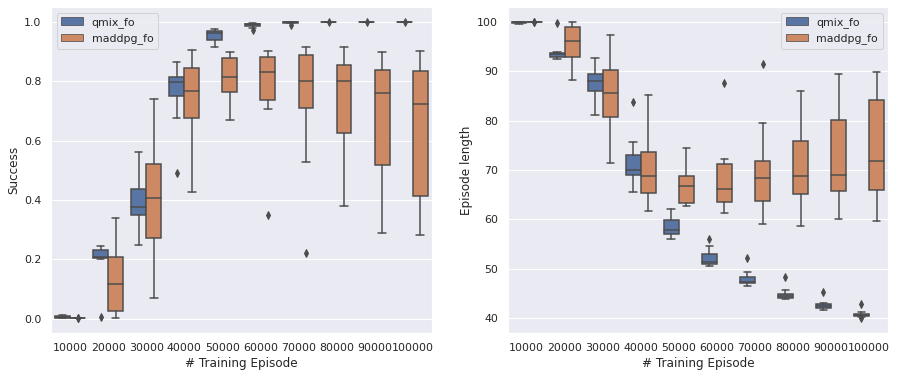

In [139]:
figure, axis = plt.subplots(1, 2, figsize=(15,6))
box_plot_runs(
    [avg10000_qmix, avg10000_maddpg], 
    x="# Training Episode", y="Success", ax=axis[0])
box_plot_runs(
    [avg10000_qmix, avg10000_maddpg], 
    x="# Training Episode", y="Episode length", ax=axis[1])

In [86]:
qmix_fo_eval = pd.read_csv("../models/coop_push_scenario_sparse/qmix_fo_rel_disc_shaped/eval_perfs.csv")
qmix_po_eval = pd.read_csv("../models/coop_push_scenario_sparse/qmix_po_rel_disc_shaped/eval_perfs.csv")
qmix_poshort_eval = pd.read_csv("../models/coop_push_scenario_sparse/qmix_poshort_rel_disc_shaped/eval_perfs.csv")
qmix_fo_eval["Name"] = "qmix_fo_eval"
qmix_po_eval["Name"] = "qmix_po_eval"
qmix_poshort_eval["Name"] = "qmix_poshort_eval"

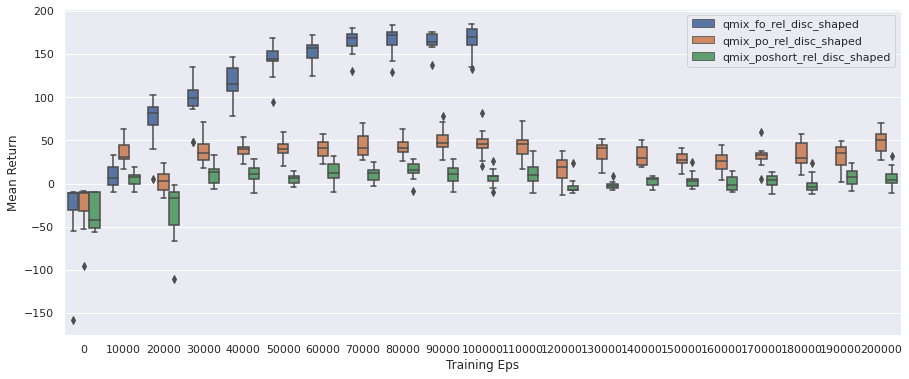

In [82]:
box_plot_runs([qmix_fo_eval,qmix_po_eval,qmix_poshort_eval])

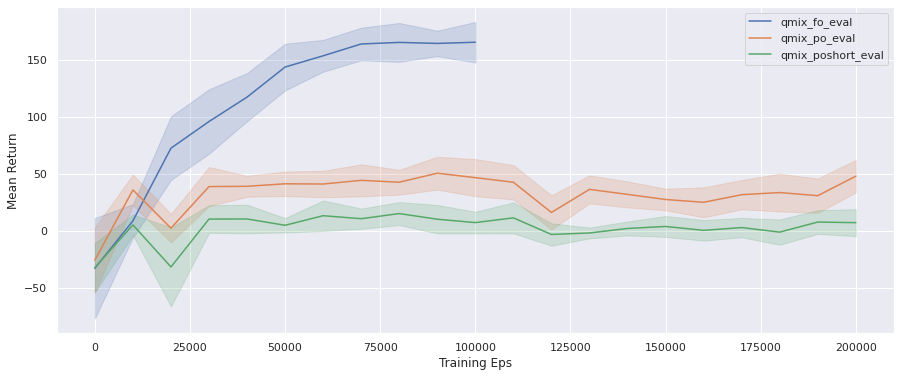

In [87]:
plot_runs([qmix_fo_eval,qmix_po_eval,qmix_poshort_eval], x="Training Eps", y="Mean Return")

In [88]:
maddpg_fo_eval = pd.read_csv("../models/coop_push_scenario_sparse/2addpg_fo_rel_disc/eval_perfs.csv")
maddpg_fo_eval["Name"] = "maddpg_fo_eval"

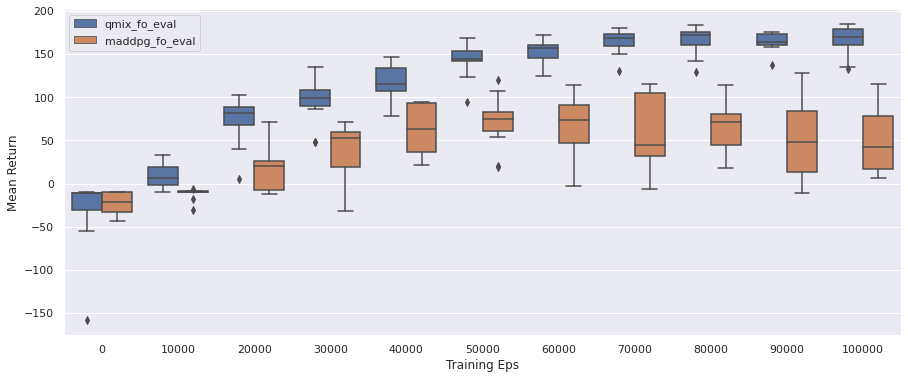

In [89]:
box_plot_runs([qmix_fo_eval, maddpg_fo_eval])